In [3]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('merge8.csv')


train_data = data[data['year'] < 2021]
test_data = data[data['year'] == 2021]

features = ['year', 'round', 'weather_warm', 'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy', 'cum_wins', 'grid', 'driver_age', 'home_race', 'points_before_race']
target = 'in_top_ten'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
}

# training using GridSearchCV
model = SVC()
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.2f}")

# predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Add a new column 'predicted_win' to the original dataframe
test_data['predicted_in_top_ten'] = y_pred
test_data['predicted_in_top_ten'] = test_data['predicted_in_top_ten'].apply(lambda x: 1 if x > 0.5 else 0)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)

Best parameters: {'C': 10, 'degree': 2, 'kernel': 'linear'}
Best score: 0.74
Accuracy: 0.75
Confusion Matrix:
[[171  49]
 [ 59 161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       220
           1       0.77      0.73      0.75       220

    accuracy                           0.75       440
   macro avg       0.76      0.75      0.75       440
weighted avg       0.76      0.75      0.75       440



C:\Users\Akhil Jayadeep\AppData\Local\Temp\ipykernel_26988\2887465713.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_in_top_ten'] = y_pred
C:\Users\Akhil Jayadeep\AppData\Local\Temp\ipykernel_26988\2887465713.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_in_top_ten'] = test_data['predicted_in_top_ten'].apply(lambda x: 1 if x > 0.5 else 0)


<AxesSubplot: >

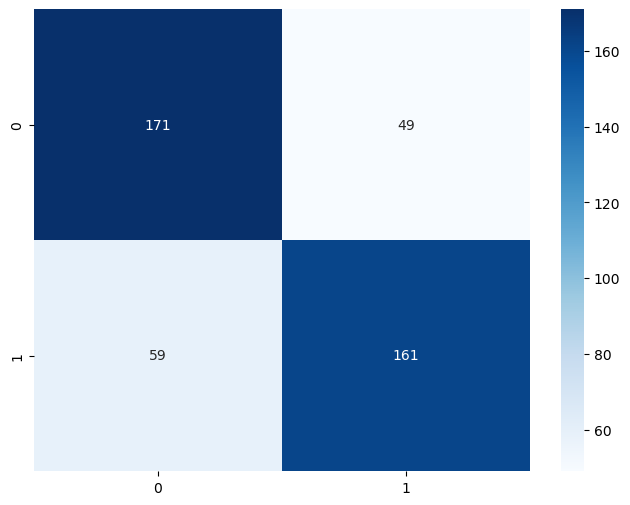

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create heatmap of confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', ax=ax)